In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

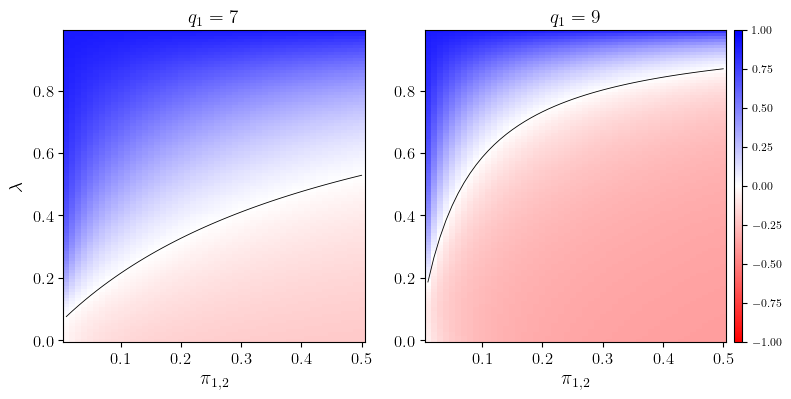

In [6]:
latexFont(titlesize=14, ticklabelssize=12, labelsize=14)
fig, ax = plt.subplots(1,2, figsize=(7.8, 3.9))
q1s, q2 = [7,9], 10
x = 2
maxQ = 1 
for i,q1 in enumerate(q1s):
    fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
    Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
    #maxQ = abs(Qmesh).max()
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, vmin = -maxQ, vmax = maxQ, cmap='bwr_r', shading='nearest')
    # if i == 2:
    #     cb = fig.colorbar(im, ax=ax[i], aspect=25, shrink=0.75, pad=0.01)
    #     cb.ax.tick_params(labelsize=8)
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    tline = tline.query('pi >= 0.01')
    ax[i].plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.6)
    ax[i].set_title(rf'$q_1 = {q1}$', pad=5)
ax[0].set_xlabel(r'$\pi_{1,2}$')
ax[1].set_xlabel(r'$\pi_{1,2}$')
ax[0].set_ylabel(r'$\lambda$')
# fig.tight_layout()

# Make some room for the colorbar
fig.subplots_adjust(left=0.07, right=0.92, bottom=0.125, top=0.925)
# Add the colorbar outside...
box = ax[1].get_position()
pad, width = 0.01, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=8)

fig.savefig(f'stateSpace_sym_q1_{q1s[0]}_{q1s[1]}_q2_{q2}_f2_{int(x)}f1.tiff')

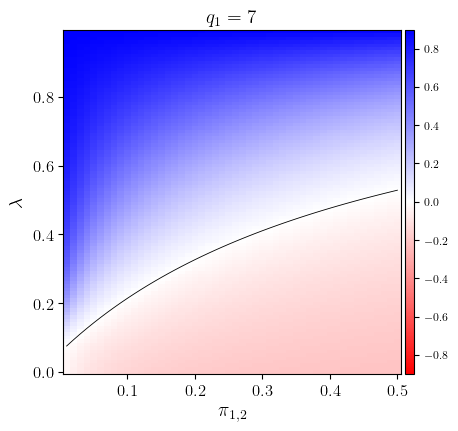

In [24]:
latexFont(titlesize=14, ticklabelssize=12, labelsize=14)
fig, ax = plt.subplots(1,1,figsize=(4.5,4.3))
q1, q2 = 7, 10
x = 2
maxQ = 1 

fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
maxQ = abs(Qmesh).max()
im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, vmin = -maxQ, vmax = maxQ, cmap='bwr_r', shading='nearest')
tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
tline = tline.query('pi >= 0.01')
ax.plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.6)
ax.set_title(rf'$q_1 = {q1}$', pad=5)
ax.set_xlabel(r'$\pi_{1,2}$')
ax.set_ylabel(r'$\lambda$')
# fig.tight_layout()

# Make some room for the colorbar
fig.subplots_adjust(left=0.125, right=0.875, bottom=0.125, top=0.925)# Add the colorbar outside...
box = ax.get_position()
pad, width = 0.01, 0.02
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=8)

fig.savefig(f'stateSpace_sym_q1_{q1}_q2_{q2}_f2_{int(x)}f1.tiff')

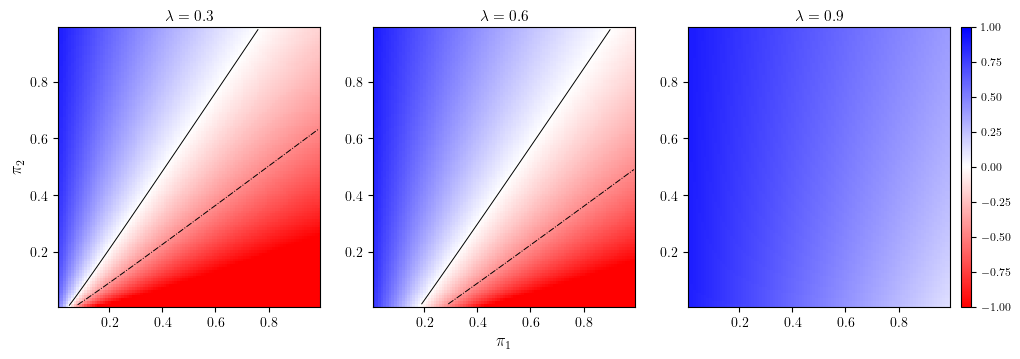

In [10]:
latexFont(titlesize=11, ticklabelssize=10, labelsize=12)
fig, ax = plt.subplots(1,3,figsize=(10.5,3.5))
lambs = [0.3, 0.6, 0.9]
q1, q2 = 7, 10
x = 2
maxQ = 1 
for i,l in enumerate(lambs):
    fsMesh = np.load(f'{path}/map_asym_q1_{q1}_q2_{q2}_l_{l}.npz')
    Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, vmin = -maxQ, vmax = maxQ, cmap='bwr_r', shading='nearest')
    for x,ls in zip([1, 2], ['-.', '-']):
        tline = pd.read_csv(f'{path}/Tline_asym_pis_q1_{q1}_q2_{q2}_l_{l}_f2_{int(x)}f1.csv')
        tline = tline.query('pi2 >= 0.01')
        ax[i].plot(tline['pi1'], tline['pi2'], color='xkcd:black', lw=0.7, ls=ls)
    ax[i].set_title(rf'$\lambda = {l}$', pad=5)
ax[1].set_xlabel('$\pi_1$')
ax[0].set_ylabel('$\pi_2$')
#fig.tight_layout()

# Make some room for the colorbar
fig.subplots_adjust(left=0.07, right=0.92, bottom=0.125, top=0.925)
# Add the colorbar outside...
box = ax[2].get_position()
pad, width = 0.01, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=8)

# fig.savefig(f'stateSpace_asym_fixPi1_pi1_{pi1}_q1_multiplot_q2_{q2}_f2_{int(x)}f1.pdf')
fig.savefig(f'stateSpace_asym_q1_multiplot_q2_{q2}_f2_{int(x)}f1.tiff')

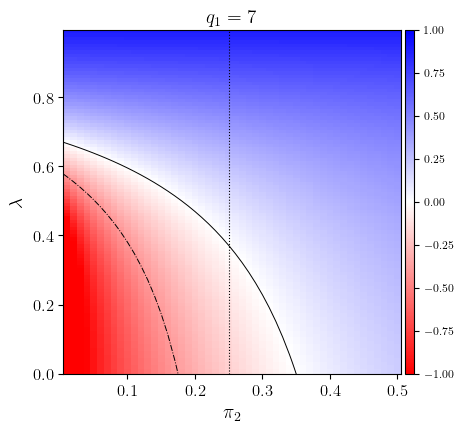

In [23]:
latexFont(titlesize=14, ticklabelssize=12, labelsize=14)
fig, ax = plt.subplots(1,1,figsize=(4.5,4.3))
q1, q2 = 7, 10
pi1 = 0.25
x = 2
maxQ = 1 

fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, vmin = -maxQ, vmax = maxQ, cmap='bwr_r', shading='nearest')
for x,ls in zip([1, 2], ['-.', '-']):
    tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    tline = tline.query('pi2 >= 0.005')
    tline = tline.rename(columns={'lambda':'l'})
    i_last_pi2 = tline.query('l != l').iloc[0].name
    tline.at[i_last_pi2, 'l'] = 0.0
    ax.plot(tline['pi2'], tline['l'], color='xkcd:black', lw=0.7, ls=ls)
ax.set_title(rf'$q_1 = {q1}$', pad=5)
# vertical line to show the value of pi1:
ax.axvline(pi1, ls=':', color='xkcd:black', lw=0.8)
ax.set_ylim(0,None)
ax.set_xlabel('$\pi_2$')
ax.set_ylabel('$\lambda$')
# fig.tight_layout()

# Make some room for the colorbar
fig.subplots_adjust(left=0.125, right=0.875, bottom=0.125, top=0.925)
# Add the colorbar outside...
box = ax.get_position()
pad, width = 0.01, 0.02
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=8)

fig.savefig(f'stateSpace_asym_fixPi1_pi1_{pi1}_q1_{q1}_q2_{q2}_f2_{int(x)}f1.tiff')